# Notes:

### to do:
1. need to setup unstructured mesh import

### ideas:
1. It would be interesting to quantify the difference in power distribution as a result of using edepmode 3. 
2. What is the mission for this NTP? Could look at how burnup changes power distribution throughout the mission.
3. what does decay heat look like after the reactor is run? does this much heat cause a problem?
4. what are the isotopes contributing the most to the decay heat? Can enriching reactor materials decrease decay heat?
5. how does importing a high-fidelity temperature distribution impact total decay heat or decay heat distribution

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import serpentTools as st
reflectorFile = 'coreSupport.txt_det0.m'
depletionFile = 'coreSupport.txt_dep.m'

{'innerReflectorAxialE': <serpentTools.detectors.CylindricalDetector object at 0x7f0bbd9eae30>, 'outerReflectorAxialE': <serpentTools.detectors.CylindricalDetector object at 0x7f0bbd9eace0>, 'innerReflectorRadialE': <serpentTools.detectors.CylindricalDetector object at 0x7f0bbd9eae00>, 'outerReflectorRadialE': <serpentTools.detectors.CylindricalDetector object at 0x7f0bbd9eae90>, 'activeCoreE': <serpentTools.detectors.HexagonalDetector object at 0x7f0bbd9ead70>}


/home/grads/z/zhughes/.local/lib/python3.10/site-packages/serpentTools/data/__init__.py:93: UserWarning: Please use serpentTools.read as the primary read function. readDataFile is intended for testing and example and may be changed or removed in the future.
  warn("Please use serpentTools.read as the primary read function. "


Text(0.5, 0.98, 'Reflector System: Axial Power Distribution')

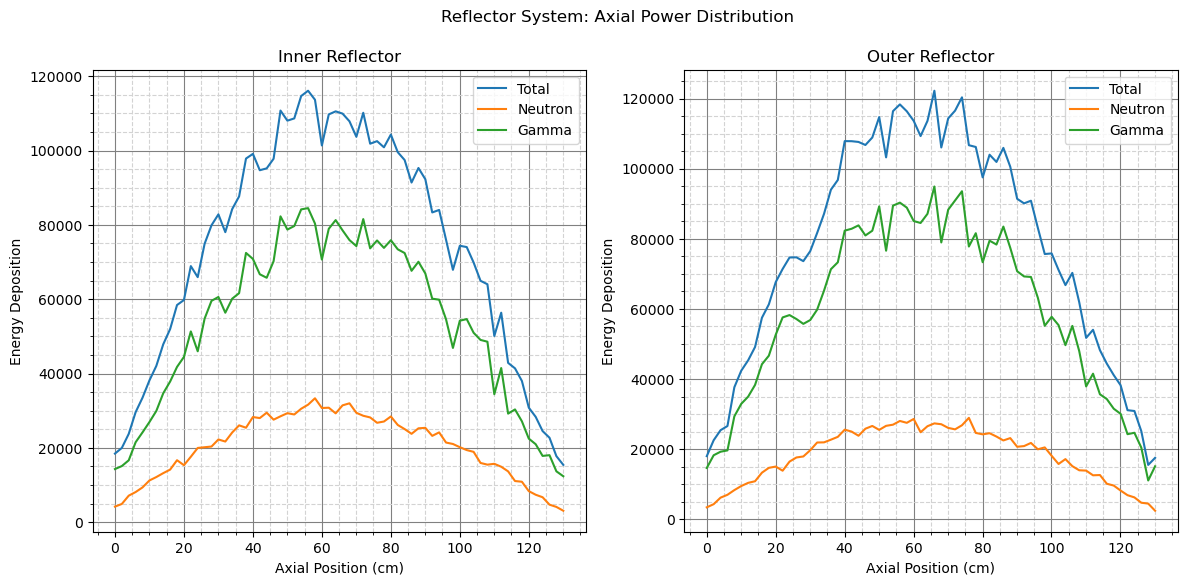

In [13]:
def plotDetector(ylab,xlab):
    plt.errorbar


# - reading detector output
reflector = st.readDataFile(reflectorFile)
print(reflector.detectors)
# assinging different detectors and adding attributes
iReflectAxialE = reflector.detectors['innerReflectorAxialE']
oReflectAxialE = reflector.detectors['outerReflectorAxialE']
iReflectRadialE = reflector.detectors['innerReflectorRadialE']
oReflectRadialE = reflector.detectors['outerReflectorRadialE']
activeCoreE = reflector.detectors['activeCoreE']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.figure(1)
for i,lab in enumerate(['Total','fiss','Neutron','Gamma']):
    if lab=="fiss": continue
    iReflectAxialE.plot(fixed={'reaction':i},
                xlabel='Axial Position (cm)',
                ylabel=f'Energy Deposition',
                xdim='zmesh',
                label=lab,
                ax=axes[0]) # plotting axial
axes[0].grid(which='major', color='gray', linestyle='-')
axes[0].minorticks_on()
axes[0].grid(which='minor', color='lightgray', linestyle='--')
axes[0].set_title('Inner Reflector')
for i,lab in enumerate(['Total','fiss','Neutron','Gamma']):
    if lab=="fiss": continue
    oReflectAxialE.plot(fixed={'reaction':i},
                xlabel='Axial Position (cm)',
                ylabel=f'Energy Deposition',
                xdim='zmesh',
                label=lab,
                ax=axes[1]) # plotting axial
axes[1].grid(which='major', color='gray', linestyle='-')
axes[1].minorticks_on()
axes[1].grid(which='minor', color='lightgray', linestyle='--')
axes[1].set_title('Outer Reflector')
plt.suptitle('Reflector System: Axial Power Distribution')

('reaction', 'rmesh')


Text(0.5, 0.98, 'Reflector System: Radial Power Distribution')

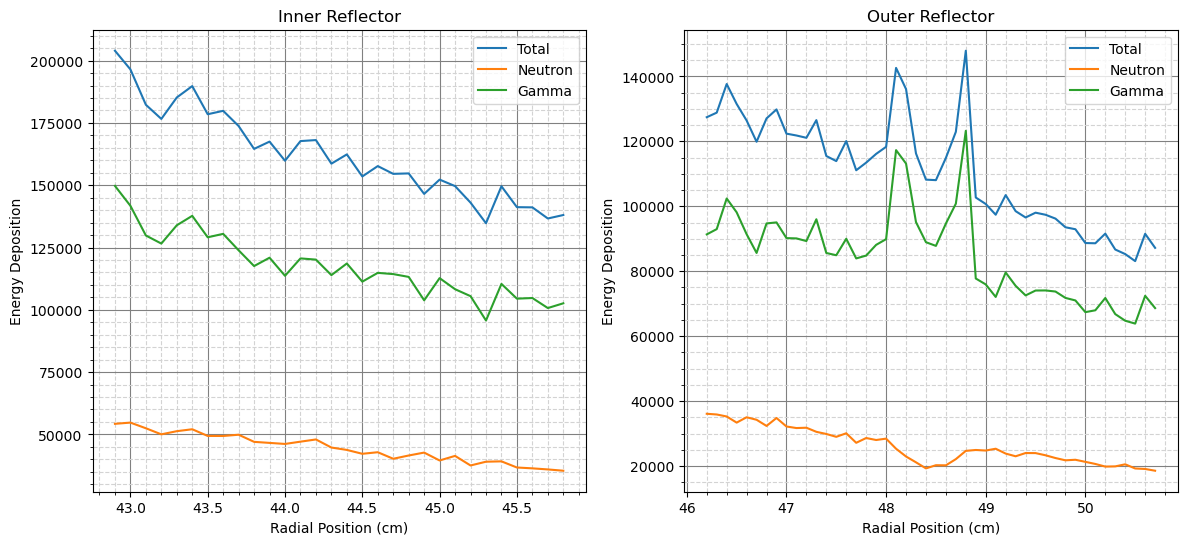

<Figure size 640x480 with 0 Axes>

In [14]:
print(iReflectRadialE.indexes)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.figure(2)
for i,lab in enumerate(['Total','fiss','Neutron','Gamma']):
    if lab=="fiss": continue
    iReflectRadialE.plot(fixed={'reaction':i},
                xlabel='Radial Position (cm)',
                ylabel=f'Energy Deposition',
                xdim='rmesh',
                label=lab,
                ax=axes[0]) # plotting axial
axes[0].grid(which='major', color='gray', linestyle='-')
axes[0].minorticks_on()
axes[0].grid(which='minor', color='lightgray', linestyle='--')
axes[0].set_title('Inner Reflector')
for i,lab in enumerate(['Total','fiss','Neutron','Gamma']):
    if lab=="fiss": continue
    oReflectRadialE.plot(fixed={'reaction':i},
                xlabel='Radial Position (cm)',
                ylabel=f'Energy Deposition',
                xdim='rmesh',
                label=lab,
                ax=axes[1]) # plotting axial
axes[1].grid(which='major', color='gray', linestyle='-')
axes[1].minorticks_on()
axes[1].grid(which='minor', color='lightgray', linestyle='--')
axes[1].set_title('Outer Reflector')
plt.suptitle('Reflector System: Radial Power Distribution')

Text(0.5, 0.98, 'Active Core: BOL Power Distribution')

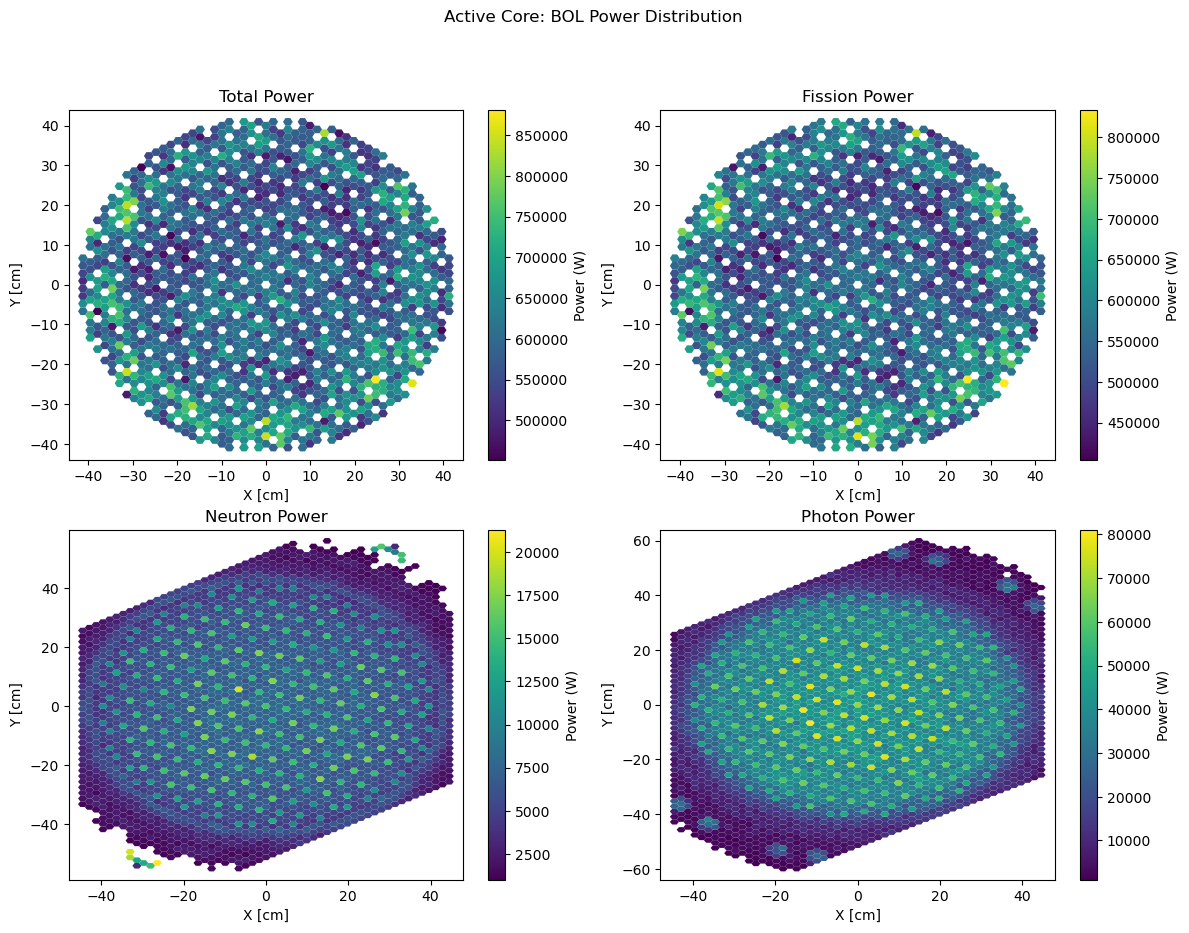

In [15]:
activeCoreE.pitch = 1.905
activeCoreE.hexType = 3
# print(activeCoreLat.tallies.shape)
# print(activeCoreLat.indexes)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
activeCoreE.hexPlot(fixed={'reaction':0},thresh=1e5,cbarLabel='Power (W)',ax=axes[0,0]) # total
activeCoreE.hexPlot(fixed={'reaction':1},thresh=1e5,cbarLabel='Power (W)',ax=axes[0,1]) # fission
activeCoreE.hexPlot(fixed={'reaction':2},thresh=1e3,cbarLabel='Power (W)',ax=axes[1,0]) # neutron
activeCoreE.hexPlot(fixed={'reaction':3},thresh=1e3,cbarLabel='Power (W)',ax=axes[1,1]) # gammas
axes[0, 0].set_title('Total Power')
axes[0, 1].set_title('Fission Power')
axes[1, 0].set_title('Neutron Power')
axes[1, 1].set_title('Photon Power')
plt.suptitle('Active Core: BOL Power Distribution')

### now looking into depletion

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import serpentTools as st
depletionFile = 'coreSupport.txt_dep.m'

{'type45': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9cc70>, 'type39': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9f610>, 'type34': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9cc10>, 'type30': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9d630>, 'type26': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9c7c0>, 'type22': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9e8c0>, 'type19': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9eaa0>, 'type17': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9d900>, 'type15': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbca9f2b0>, 'total': <serpentTools.objects.materials.DepletedMaterial object at 0x7f0bbcd9a440>}


/home/grads/z/zhughes/.local/lib/python3.10/site-packages/serpentTools/data/__init__.py:93: UserWarning: Please use serpentTools.read as the primary read function. readDataFile is intended for testing and example and may be changed or removed in the future.
  warn("Please use serpentTools.read as the primary read function. "


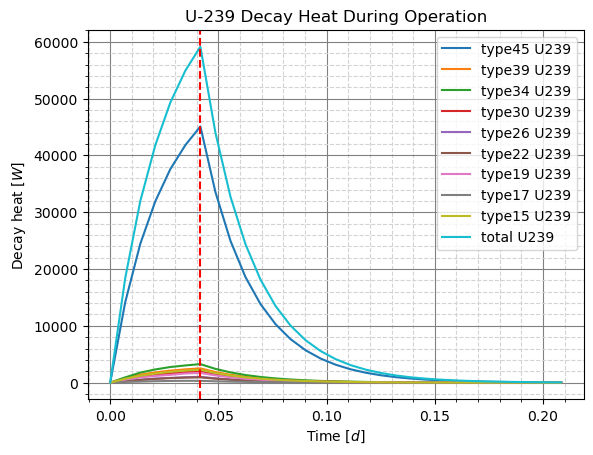

In [22]:
dep = st.readDataFile(depletionFile)

print(dep.materials)

# -- below plots total and u239 decay heat
# u239 beta-decays into np239. has half life of 23min
# dep.materials['type45'].plot('days','h',names=('U239','Np239','total'))
# -- above plots total and u239 decay heat

# -- below plots total decay heat
# u239 beta-decays into np239. has half life of 23min
# dep.plot('days','h',names=('total'),materials=dep.materials.keys())
# -- above plots total decay heat


# -- below plots burnup as function of time for each mat
# for mat in dep.materials.keys():
#     plt.plot(dep.materials[mat].days,dep.materials[mat].burnup,label=mat)
# plt.grid(which='major', color='gray', linestyle='-')
# plt.minorticks_on()
# plt.grid(which='minor', color='lightgray', linestyle='--')
# plt.legend()
# -- above plots burnup as function of time for each mat

# -- below plots u239 atom density as function of time
# dep.plot('days', 'adens', names='U239',
#           materials=dep.materials.keys())
# plt.grid(which='major', color='gray', linestyle='-')
# plt.minorticks_on()
# plt.grid(which='minor', color='lightgray', linestyle='--')
# plt.title("U-239 Atom Density During Operation")
# plt.axvline(x=(0.04166666666*2),c='r',linestyle='dashed')
# plt.legend()
# -- above plots u239 atom density as function of time

# -- below plots u239 decay heat as function of time
dep.plot('days', 'h', names='U239',
          materials=dep.materials.keys())
plt.grid(which='major', color='gray', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='lightgray', linestyle='--')
plt.title("U-239 Decay Heat During Operation")
plt.axvline(x=(0.04166666666),c='r',linestyle='dashed')
plt.legend()
# -- above plots u239 decay heat as function of time
